### 230528 하은서 필수과제2 
- 주가 예측해 보기 !
- 하나의 기업말고 두 개 이상으로 비교해 주세요, ex) 경쟁사, 동종기업, 보완재 등등 다양한 비교가능한 기업들의 주가를 비교 예측해 보는 것
- 실제 금융데이터를 기반으로 주가를 예측하고, 실제 값과 예측한 값이 얼마나 차이나는지를 확인해 보기 
- 투자했을 때 얻을 수 있는 수익까지 간단하게 계산해 보면서 시계열데이터 예측을 진행해 보자!

In [1]:
pip install finance-datareader

In [23]:
import FinanceDataReader as fdr
import numpy as np 
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [13]:
kr = fdr.StockListing('KRX')
kr

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,71100,2,-700,-0.97,71300,71700,70900,8261566,587479462200,424451539305000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,558000,2,-30000,-5.10,579000,580000,558000,735898,415448718000,130572000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,114500,2,-4400,-3.70,118000,118500,113500,3446704,396641305700,83356270792500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,772000,2,-3000,-0.39,775000,779000,772000,27604,21364306000,54946328000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,750000,1,7000,0.94,747000,763000,730000,262183,196457619000,52944257250000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1589,1,1,0.06,1589,1589,1589,1,1589,2510556440,1579960,KNX
2719,288490,KR7288490006,나라소프트,KONEX,일반기업부,52,2,-5,-8.77,58,59,49,1834805,92880454,1983644000,38147000,KNX
2720,322190,KR7322190000,베른,KONEX,일반기업부,165,1,11,7.14,169,169,131,122,20180,1472657505,8925197,KNX
2721,000547,KR7000542001,흥국화재2우B,KOSPI,,9570,2,-530,-5.25,10100,10200,9560,5487,53750470,1469952000,153600,STK


In [49]:
x = fdr.DataReader('352820')
x

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-06-13,294500,296500,289000,294000,209505,0.000000
2023-06-14,295000,307500,288500,292000,448757,-0.006803
2023-06-15,296000,302500,295500,300500,329373,0.029110


In [26]:
dic = { 'ds' : x.index,
       'y' : x.Close}

In [29]:
from pandas import DataFrame
import pandas as pd

In [30]:
df = pd.DataFrame(dic)
df

,ds,y
Date,,
2020-10-15,2020-10-15,255420
2020-10-16,2020-10-16,198495
2020-10-19,2020-10-19,187110
2020-10-20,2020-10-20,180675
2020-10-21,2020-10-21,177210
...,...,...
2023-06-13,2023-06-13,294000
2023-06-14,2023-06-14,292000
2023-06-15,2023-06-15,300500


In [32]:
df.reset_index(inplace=True)

del df['Date']

In [33]:
df

,ds,y
0,2020-10-15,255420
1,2020-10-16,198495
2,2020-10-19,187110
3,2020-10-20,180675
4,2020-10-21,177210
...,...,...
657,2023-06-13,294000
658,2023-06-14,292000
659,2023-06-15,300500
660,2023-06-16,297500


<Axes: xlabel='ds'>

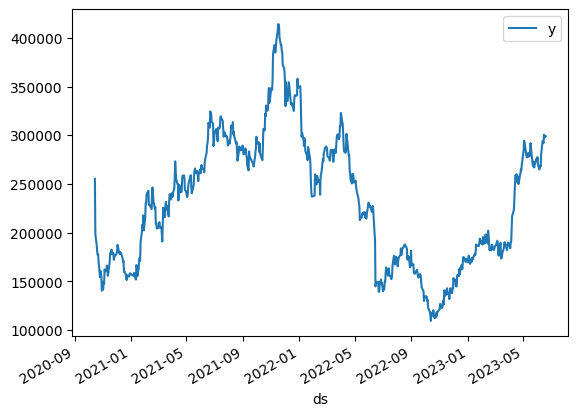

In [37]:
df.plot('ds')

In [74]:
test = df[661:]
test

,ds,y
661,2023-06-19,299000


# 예측하기

In [65]:
prophet = Prophet(daily_seasonality=True)

# 데이터 학습
prophet.fit(df)

15:07:54 - cmdstanpy - INFO - Chain [1] start processing
15:07:55 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
# 향후 30일치 예측값
future =prophet.make_future_dataframe( periods=20)
forecast = prophet.predict(future)

In [70]:
#실제예측한 값
ph_yhat=forecast[['ds','yhat']][662:] 
ph_yhat

,ds,yhat
662,2023-06-20,273927.206396
663,2023-06-21,273242.946281
664,2023-06-22,274357.809647
665,2023-06-23,274091.788487
666,2023-06-24,288111.778368
667,2023-06-25,288255.798020
668,2023-06-26,273837.889941
669,2023-06-27,274783.393445
670,2023-06-28,274303.473935
671,2023-06-29,275648.727326


          ds           yhat     yhat_lower     yhat_upper
0 2020-10-15  135545.482434  108795.423982  162812.990033
1 2020-10-16  136384.287783  108892.640605  163459.066604
2 2020-10-19  139370.138013  110919.545843  167113.594631
3 2020-10-20  141375.510065  113423.496287  169039.826703
4 2020-10-21  141949.282020  115305.865178  169254.329233


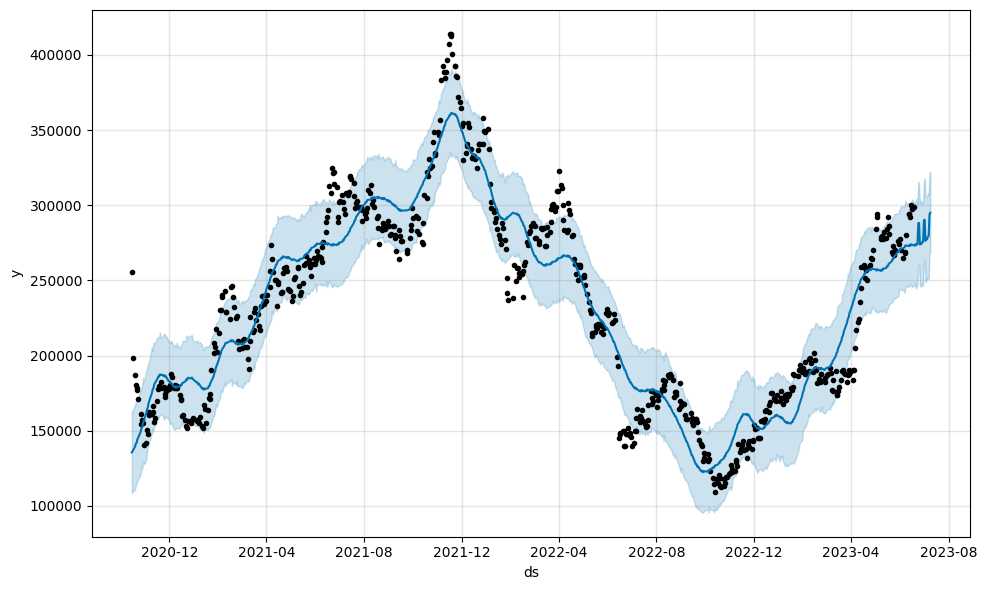

In [71]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

prophet.plot(forecast)
plt.show()